In [1]:
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

#loading one of the given file for data
data1 = open('aithon_level_3_2020-09-22T05_11_55.txt',encoding='utf-8').read()

In [2]:
data = []
count=0
for i in range(len(data1)):
    if data1[i]==',' and data1[i-1:i+3]=='}, {':
        if count==0:
            Dict = eval(data1[1:i])
            count=i+1
            data.append(Dict)
        elif i==-1:
            Dict=eval(data1[count:-1])
            data.append(Dict)
            break
        else:
            Dict = eval(data1[count:i])
            count = i+1
            data.append(Dict)
data[0] #we get our data with defined values as keys of a dictionary

{'text': 'Curve flattening? Kenya records 48 new virus cases, 176 recoveries https://t.co/mnXgUE1EnE via @thestarkenya \n\nAfter we ATE CORONA MONEY, someone at the @MOH_Kenya has been consulting with Darrel Huff (1954), "How to lie with statistics". \n\nPlease just give us a break.',
 'location': 'IN',
 'date': 'Sep 22',
 'time': '05:08:45'}

In [3]:
data[0]['text'] #extracting text from the data

'Curve flattening? Kenya records 48 new virus cases, 176 recoveries https://t.co/mnXgUE1EnE via @thestarkenya \n\nAfter we ATE CORONA MONEY, someone at the @MOH_Kenya has been consulting with Darrel Huff (1954), "How to lie with statistics". \n\nPlease just give us a break.'

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Analysing single tweet

In [5]:
#demo of analysing a tweet
tweet = data[0]['text']

def sentiment_analyser(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    return(score)
sentiment_analyser(tweet)

{'neg': 0.0, 'neu': 0.943, 'pos': 0.057, 'compound': 0.3182}

In [6]:
score = sentiment_analyser(tweet)
score = dict(score)

In [7]:
data[0].update(score)
data[0]

{'text': 'Curve flattening? Kenya records 48 new virus cases, 176 recoveries https://t.co/mnXgUE1EnE via @thestarkenya \n\nAfter we ATE CORONA MONEY, someone at the @MOH_Kenya has been consulting with Darrel Huff (1954), "How to lie with statistics". \n\nPlease just give us a break.',
 'location': 'IN',
 'date': 'Sep 22',
 'time': '05:08:45',
 'neg': 0.0,
 'neu': 0.943,
 'pos': 0.057,
 'compound': 0.3182}

In [8]:
len(data)

17597

In [9]:
for i in range(len(data)):
    score = sentiment_analyser(data[i]['text'])
    data[i].update(score)
data[1]

{'text': 'Victoria and Melbourne Covid trend map: where coronavirus cases are rising or falling https://t.co/9jDVbL3tJ2 https://t.co/H2WOfiL922',
 'location': 'Erbil, Iraq',
 'date': 'Sep 22',
 'time': '05:08:34',
 'neg': 0.103,
 'neu': 0.897,
 'pos': 0.0,
 'compound': -0.1531}

In [10]:
final_data = pd.DataFrame(data)

In [11]:
final_data.iloc[1,:] #we have out dataframe ready

text        Victoria and Melbourne Covid trend map: where ...
location                                          Erbil, Iraq
date                                                   Sep 22
time                                                 05:08:34
neg                                                     0.103
neu                                                     0.897
pos                                                         0
compound                                              -0.1531
Name: 1, dtype: object

In [12]:
final_data['label'] = 0
final_data.loc[final_data['compound'] > 0.2, 'label'] = 1
final_data.loc[final_data['compound'] < -0.2, 'label'] = -1
final_data.iloc[0,:]

text        Curve flattening? Kenya records 48 new virus c...
location                                                   IN
date                                                   Sep 22
time                                                 05:08:45
neg                                                         0
neu                                                     0.943
pos                                                     0.057
compound                                               0.3182
label                                                       1
Name: 0, dtype: object

In [13]:
#separating a dataframe only of tweets and labels
df = final_data[['text', 'label']]
df.iloc[0,:]

text     Curve flattening? Kenya records 48 new virus c...
label                                                    1
Name: 0, dtype: object

In [21]:
print("Positive tweets:\n")
pprint(list(df[df['label'] == 1].text)[:2], width=200)
print('-------------------------------------------------------------')
print("\nNegative tweets:\n")
pprint(list(df[df['label'] == -1].text)[:2], width=200)

Positive tweets:

['Curve flattening? Kenya records 48 new virus cases, 176 recoveries https://t.co/mnXgUE1EnE via @thestarkenya \n'
 '\n'
 'After we ATE CORONA MONEY, someone at the @MOH_Kenya has been consulting with Darrel Huff (1954), "How to lie with statistics". \n'
 '\n'
 'Please just give us a break.',
 'IT’S BAKE OFF DAY! \ud83d\ude4c\ud83c\udffc\n'
 '\n'
 'Who else will be tuning in at 8pm?\n'
 '\n'
 'I recently read this really interesting article about how they were able to film this series during corona times, so I thought I’d share it with you guys ahead of tonight’s episode: '
 'https://t.co/VyKYfOzE3Q https://t.co/17Z2u8nMge']
-------------------------------------------------------------

Negative tweets:

['@Mom06887547 @realDonaldTrump According to the CDC out of the 200,000 deaths only 6% are 100% COVID related.  They get paid for reporting it as a Corona Virus fatality.',
 'When people dont want to follow the rules, dont expect any help when you get it....i cant bel

In [16]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    6626
 1    5530
-1    5441
Name: label, dtype: int64
 0    37.654146
 1    31.425811
-1    30.920043
Name: label, dtype: float64


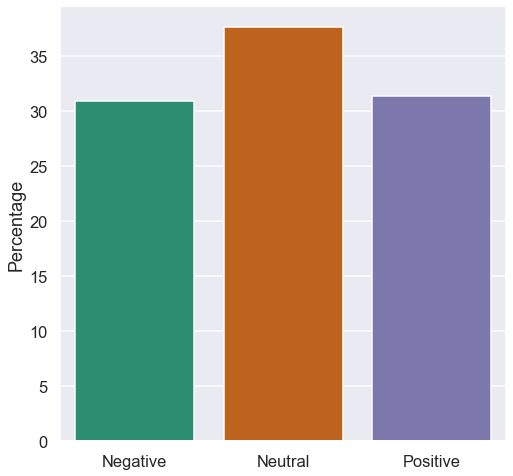

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [22]:
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords
import string

In [28]:
data1 = open('aithon_level_3_2020-09-22T05_31_23.txt',encoding='utf-8').read()

In [29]:
#pre-processing and cleaning tweets to bring our data in proper format.
def processTweet(tweet):
    tweet = tweet.lower() # convert text to lower-case
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
    tweet = tweet.translate(str.maketrans('','',string.punctuation))
    tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
    return [word for word in tweet if word not in stopwords.words('english')]
final_words = processTweet(data1)
final_words = set(final_words)
len(final_words)

49008

In [30]:
final_words = list(final_words)
file = open('emotions.txt','r')
emotion_list = [] #to save final emotions at a place
for line in file:    
    clear_line = line.replace('\n','').replace(',','').replace("'",'').strip() #cleaning all the parsers
    word,emotion = clear_line.split(':') # separating words from emotions for processing
    
    if word in final_words:
        emotion_list.append(emotion) # appending if any emotion found in our data
        
print(set(emotion_list)) #to know what basic emotions we have in tweet's data

{' loved', ' cheated', ' burdened', ' belittled', ' ecstatic', ' lost', ' codependent', ' esteemed', ' powerless', ' lustful', ' trust', ' angry', ' surprise', ' attached', ' fear', ' confusion', ' alone', ' happy', ' entitled', ' disgust', ' average', ' attracted', ' anxious', ' independent', ' fearless', ' embarrassed', ' focused', ' safe', ' sad', ' obsessed', ' anticipation', ' joy', ' demoralized', ' hate', ' free', ' apathetic', ' adequate', ' bored'}


In [31]:
from collections import Counter
w = Counter(emotion_list)
w

Counter({' cheated': 8,
         ' attracted': 17,
         ' sad': 25,
         ' happy': 23,
         ' angry': 14,
         ' esteemed': 5,
         ' lustful': 1,
         ' attached': 7,
         ' embarrassed': 3,
         ' powerless': 13,
         ' fearless': 5,
         ' bored': 2,
         ' safe': 2,
         ' adequate': 8,
         ' fear': 26,
         ' average': 3,
         ' apathetic': 4,
         ' surprise': 5,
         ' obsessed': 2,
         ' hate': 7,
         ' focused': 3,
         ' demoralized': 2,
         ' belittled': 3,
         ' alone': 11,
         ' entitled': 6,
         ' ecstatic': 3,
         ' free': 3,
         ' lost': 2,
         ' independent': 3,
         ' codependent': 2,
         ' anxious': 6,
         ' burdened': 1,
         ' loved': 3,
         ' anticipation': 2,
         ' confusion': 1,
         ' disgust': 6,
         ' joy': 7,
         ' trust': 2})

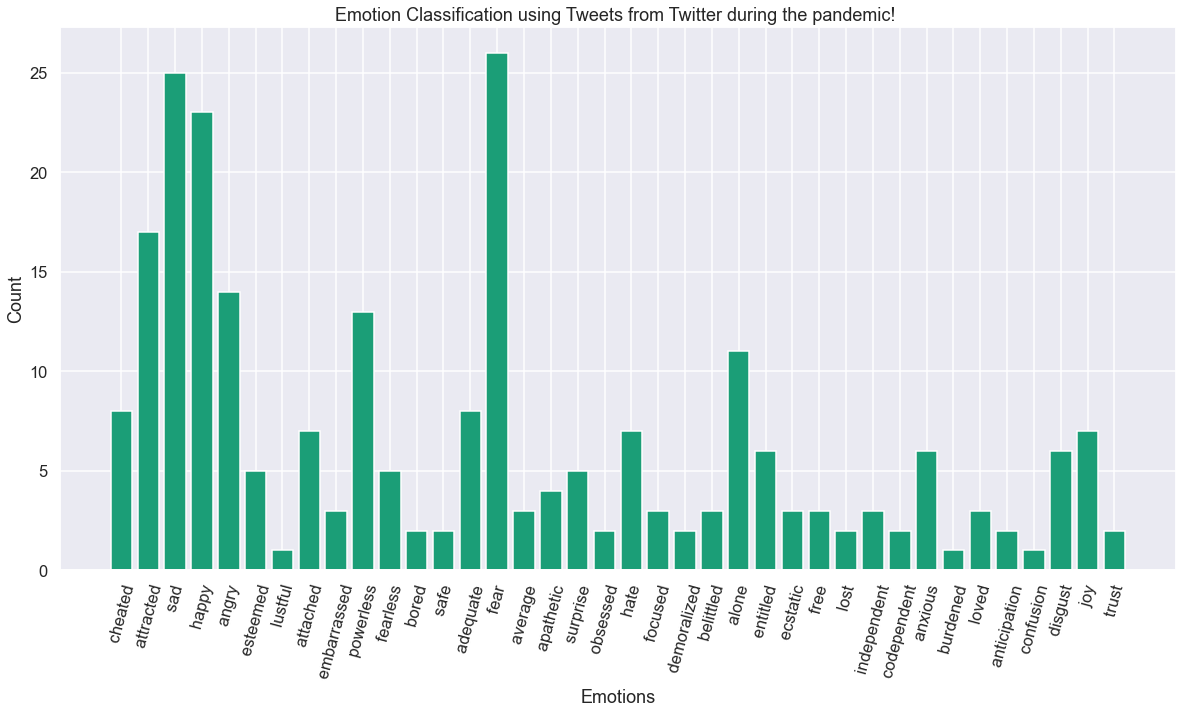

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(w.keys(),w.values()) #plotting based on the counters what we found in 'w'
plt.xticks(rotation=75)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Emotion Classification using Tweets from Twitter during the pandemic! ')
plt.show()

In [80]:
import collections
sorted_w = sorted(w.items(), key=lambda kv: kv[1],reverse=True)
sorted_dict = collections.OrderedDict(sorted_w)
sorted_dict
list_of_top_10_emotions = list(sorted_dict.items())
suma=0
for i in range(10,len(list_of_top_10_emotions)):
    suma += list_of_top_10_emotions[i][1]
top_10_emotions = list_of_top_10_emotions[:10]
top_10_emotions.append(('Others',suma))
top_10_emotions = dict(top_10_emotions)
top_10_emotions

{' fear': 26,
 ' sad': 25,
 ' happy': 23,
 ' attracted': 17,
 ' angry': 14,
 ' powerless': 13,
 ' alone': 11,
 ' cheated': 8,
 ' adequate': 8,
 ' attached': 7,
 'Others': 94}

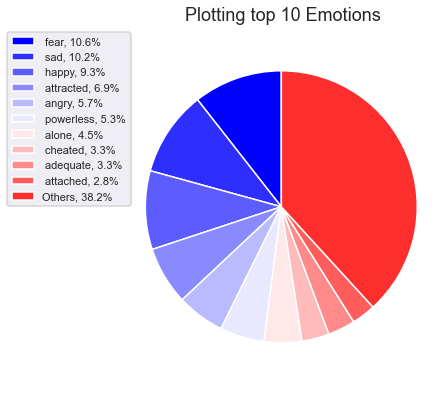

In [85]:
import matplotlib.pyplot as plt

labels = top_10_emotions.keys()
sizes = top_10_emotions.values()

fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Plotting top 10 Emotions')
plt.show()